In [1]:
pwd

'C:\\Users\\Miya\\Desktop\\jp'

In [6]:
cd facts

C:\Users\Miya\Desktop\jp\facts


In [10]:
cd about_tip

C:\Users\Miya\Desktop\jp\facts\about_tip


In [53]:
ls

 Volume in drive C is OS
 Volume Serial Number is C803-CD91

 Directory of C:\Users\Miya\Desktop\jp\facts\about_tip

12/24/2016  09:16 PM    <DIR>          .
12/24/2016  09:16 PM    <DIR>          ..
12/24/2016  09:16 PM           115,270 daily_paytype.csv
12/23/2016  04:38 PM            65,299 not_tip_date.csv
12/24/2016  08:36 PM               156 not_tip_Holiday.csv
12/23/2016  04:38 PM               933 not_tip_hour.csv
12/23/2016  04:38 PM               488 not_tip_icon.csv
12/23/2016  04:38 PM               229 not_tip_RateCodeID.csv
12/23/2016  04:38 PM               291 not_tip_wd.csv
12/23/2016  04:38 PM               286 tip_Holiday.csv
12/23/2016  04:38 PM             2,290 tip_hour.csv
12/23/2016  04:38 PM               982 tip_icon.csv
12/23/2016  04:38 PM               637 tip_RateCodeID.csv
12/23/2016  04:38 PM               731 tip_wd.csv
              12 File(s)        187,592 bytes
               2 Dir(s)  51,517,145,088 bytes free


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
tip_date_count = pd.read_csv('not_tip_date.csv',index_col = 0,parse_dates = ['date']).sort_values('date')
daily_paytype = pd.read_csv('daily_paytype.csv',index_col = 0,parse_dates = ['date']).sort_values('date')

In [12]:
daily_paytype = daily_paytype.dropna()
daily_paytype.head()

,date,Payment_type,count
1455,2013-09-30,1.0,2
2583,2013-10-01,1.0,1510
1499,2013-10-02,1.0,1641
1516,2013-10-03,1.0,2017
1247,2013-10-04,1.0,2226


In [13]:
tip_percentage = tip_date_count.groupby(['date','not_tip']).sum().groupby(level=0).apply(lambda x: x/float(x.sum()))

In [14]:
pay_percentage = daily_paytype.groupby(['date','Payment_type']).sum().groupby(level=0).apply(lambda x: x/float(x.sum()))

In [16]:
pay_percentage.reset_index(level=0, inplace=True) # twice

In [18]:
tip_percentage.reset_index(level=0, inplace=True) # twice

In [19]:
pay_percentage.head()

,Payment_type,date,count
0,1.0,2013-09-30,1.0
1,1.0,2013-10-01,1.0
2,1.0,2013-10-02,1.0
3,1.0,2013-10-03,1.0
4,1.0,2013-10-04,1.0


In [23]:
pay_1 = pay_percentage[pay_percentage['Payment_type']==1.0]

In [28]:
pay_1_per = pay_1[pay_1['date']>=pd.Timestamp('2015-02-01')]['count'].values

In [33]:
pay_1 = pay_percentage[pay_percentage['Payment_type']==1.0]
pay_1_per = pay_1[pay_1['date']>=pd.Timestamp('2015-02-01')]['count']

In [40]:
import numpy
numpy.corrcoef(pay_1_per.values, tip_per_tip)[0, 1]

0.38479334125896558

In [39]:
tip_per = tip_percentage[tip_percentage['date']>=pd.Timestamp('2015-02-01')]
tip_per_tip = tip_per[tip_per['not_tip']==True]['count(date)'].values

In [65]:
pay_percentage.Payment_type.unique()

array([ 1.,  2.,  3.,  4.,  5.])

KeyError: 3.0

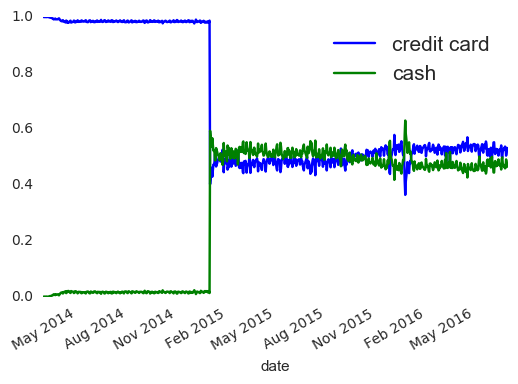

In [72]:
fig, ax = plt.subplots()
colors = {1.0:'blue',2.0:'green'}

grouped = pay_percentage.groupby('Payment_type')
for key, group in grouped:
    group.plot(ax=ax, x='date', y='count', label=key, color=colors[key],figsize=(6,4))
    ax.set_axis_bgcolor("white")
    plt.legend(['credit card','cash'],loc='best',prop={'size':15})
    ax.set_xlim(pd.Timestamp('2014-03-01'), pd.Timestamp('2016-07-01'))

plt.show()

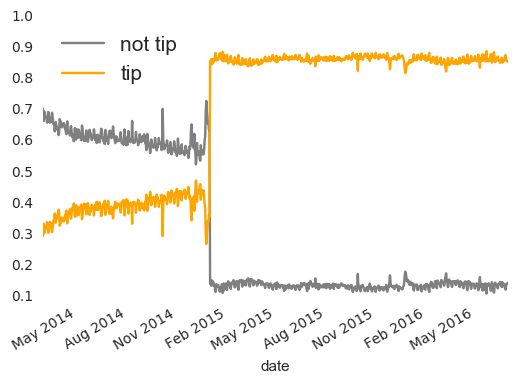

In [71]:
import seaborn
fig, ax = plt.subplots()
colors = {True:'orange',False:'grey'}

grouped = tip_percentage.groupby('not_tip')
for key, group in grouped:
    group.plot(ax=ax, x='date', y='count(date)', label=key, color=colors[key],figsize=(6,4))
    ax.set_axis_bgcolor("white")
    plt.legend(['not tip','tip'],loc='best',prop={'size':15})
    ax.set_xlim(pd.Timestamp('2014-03-01'), pd.Timestamp('2016-07-01'))

plt.show()

In [34]:
%matplotlib inline
tip_percentage.plot(x= 'date',y ='count(date)',color = 'not_tip')

ValueError: to_rgba: Invalid rgba arg "not_tip"
to_rgb: Invalid rgb arg "not_tip"
could not convert string to float: 'not_tip'